# 1. IMPORT LIBRARIES

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from models import LogisticRegression, KNN, find_best_k, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc_score, cross_validation
from visualization import plot_confusion_matrix, plot_training_history, plot_roc_curve

# 2. LOAD DATA

In [92]:
X_train = np.load('../data/processed/X_train.npy')
X_test = np.load('../data/processed/X_test.npy')
y_train = np.load('../data/processed/y_train.npy')
y_test = np.load('../data/processed/y_test.npy')

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Test shape:  {X_test.shape}, {y_test.shape}")

Train shape: (8102, 16), (8102,)
Test shape:  (2025, 16), (2025,)


# 3. LOGISTIC REGRESSION

## 3.1 Cross Validation

In [93]:
cv_scores_log, cv_mean_log, cv_std_log = cross_validation(
    X_train, y_train, 
    model_class=LogisticRegression, 
    k_folds=5, 
    learning_rate=0.1, n_iterations=3000, regularization = 'l2', lambda_reg = 0.01
)
print(f"CV Scores: {cv_scores_log}")
print(f"CV Accuracy: {cv_mean_log:.4f} (+/- {cv_std_log:.4f})")

CV Scores: [0.89512647 0.90499692 0.88950617 0.90617284 0.9       ]
CV Accuracy: 0.8992 (+/- 0.0062)


## 3.2 Model Training

In [94]:
log_reg = LogisticRegression(learning_rate=0.1, n_iterations=10000, regularization = 'l2', lambda_reg = 0.01)
log_reg.fit(X_train, y_train)
print("Training completed.")

Training completed.


## 3.3 Training History Visualization

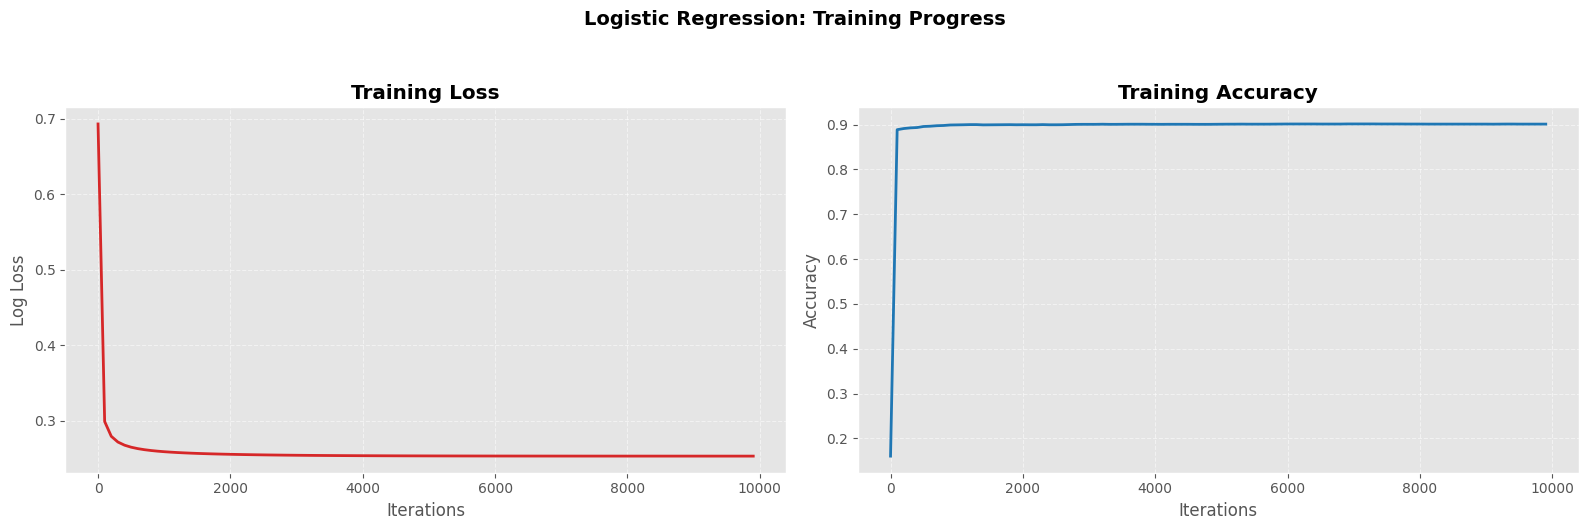

In [95]:
plot_training_history(log_reg, title='Logistic Regression: Training Progress')

## 3.4 Evaluation

In [96]:
y_pred_log = log_reg.predict(X_test, threshold=0.3)
y_prob_log = log_reg.predict_proba(X_test)

acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)

print(f"LOGISTIC REGRESSION METRICS")
print(f"Accuracy:  {acc_log:.4f}")
print(f"Precision: {prec_log:.4f}")
print(f"Recall:    {rec_log:.4f}")
print(f"F1-Score:  {f1_log:.4f}")

LOGISTIC REGRESSION METRICS
Accuracy:  0.8805
Precision: 0.6261
Recall:    0.6453
F1-Score:  0.6355


## 3.5 Confusion Matrix

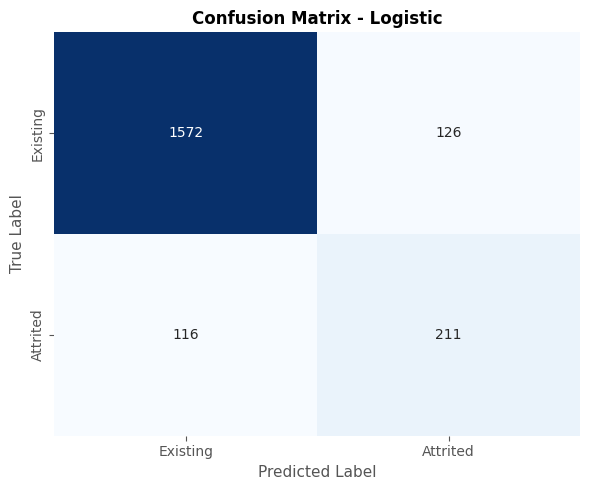

In [97]:
cm_log = confusion_matrix(y_test, y_pred_log) 
plot_confusion_matrix(cm_log, classes=['Existing', 'Attrited'], title='Confusion Matrix - Logistic')

## 3.6 ROC & AUC

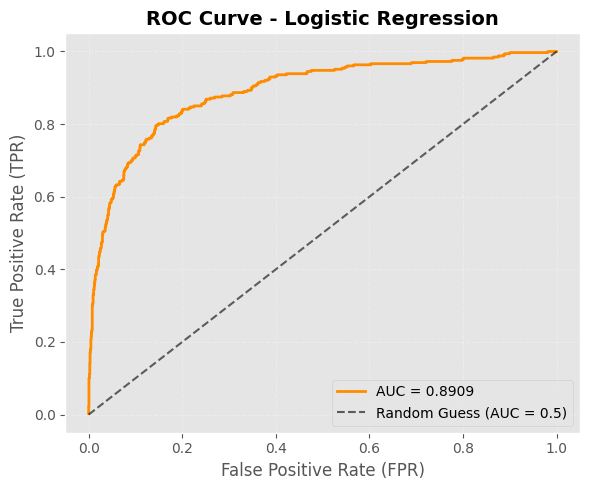

In [98]:
fpr_log, tpr_log = roc_curve(y_test, y_prob_log)
auc_log = auc_score(fpr_log, tpr_log)
plot_roc_curve(fpr_log, tpr_log, auc_log, title='ROC Curve - Logistic Regression')


# 4. K-Nearest Neighbors (KNN)

## 4.1 Find Best K

Finding Optimal K...
Optimal K: 13 (Accuracy: 0.9022)


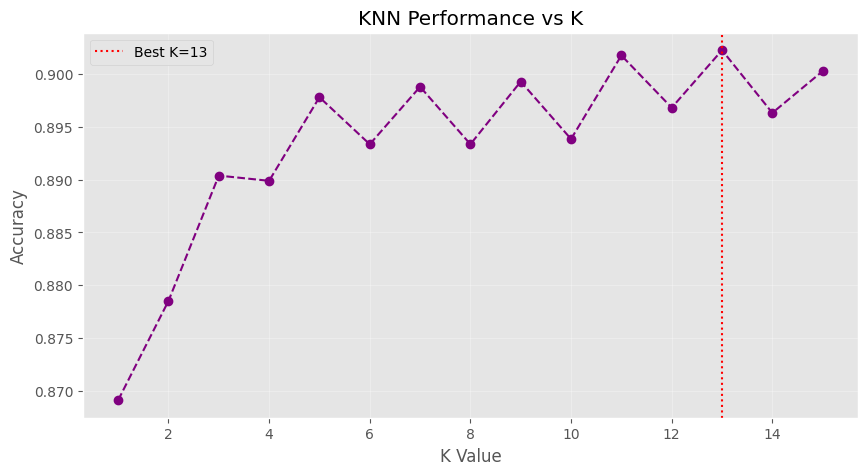

In [99]:
print("Finding Optimal K...")
best_k, best_acc, acc_history = find_best_k(X_train, y_train, X_test, y_test, max_k=15)
print(f"Optimal K: {best_k} (Accuracy: {best_acc:.4f})")

plt.figure(figsize=(10, 5))
plt.plot(range(1, 16), acc_history, marker='o', linestyle='--', color='purple')
plt.axvline(best_k, color='red', linestyle=':', label=f'Best K={best_k}')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN Performance vs K')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4.2 Cross Validation

In [100]:
cv_scores_knn, cv_mean_knn, cv_std_knn = cross_validation(
    X_train, y_train, 
    model_class=KNN, 
    k_folds=5, 
    k=best_k
)
print(f"CV Scores: {cv_scores_knn}")
print(f"Mean CV Accuracy: {cv_mean_knn:.4f} (+/- {cv_std_knn:.4f})")

CV Scores: [0.89944479 0.89821098 0.90555556 0.90432099 0.90740741]
Mean CV Accuracy: 0.9030 (+/- 0.0036)


## 4.2 Model Training

In [101]:
knn_model = KNN(k=best_k)
knn_model.fit(X_train, y_train)
print("Training completed.")

Training completed.


In [102]:
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
rec_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN METRICS (K={best_k})")
print(f"Accuracy:  {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall:    {rec_knn:.4f}")
print(f"F1-Score:  {f1_knn:.4f}")

KNN METRICS (K=13)
Accuracy:  0.9022
Precision: 0.8728
Recall:    0.4618
F1-Score:  0.6040


## 4.3 Confusion Matrix

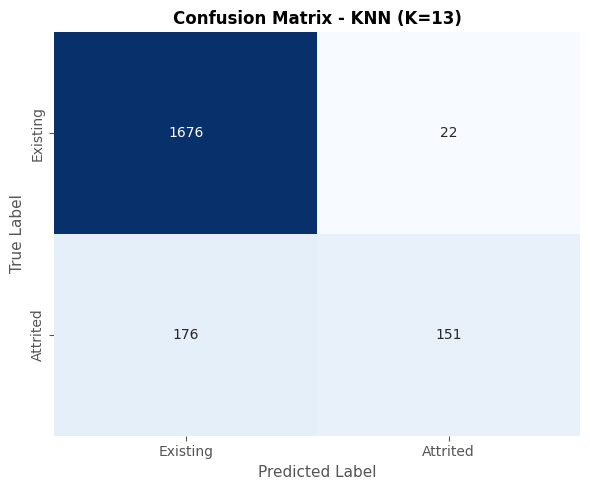

In [103]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plot_confusion_matrix(cm_knn, classes=['Existing', 'Attrited'], title=f'Confusion Matrix - KNN (K={best_k})')

## 4.4 ROC & AUC

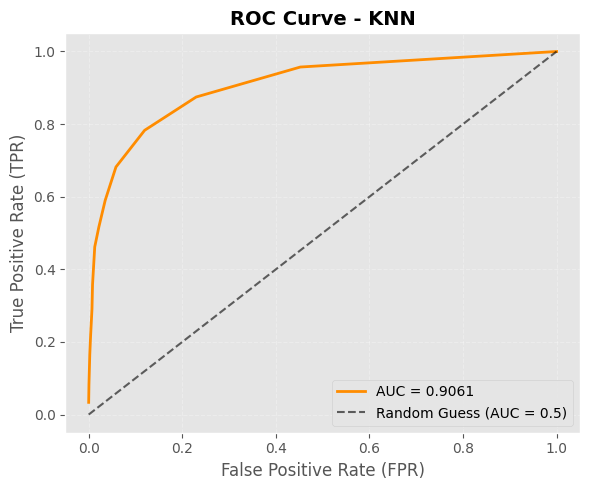

In [104]:
fpr_knn, tpr_knn = roc_curve(y_test, y_prob_knn)
auc_knn = auc_score(fpr_knn, tpr_knn)
plot_roc_curve(fpr_knn, tpr_knn, auc_knn, title='ROC Curve - KNN')

# 5 KIỂM TRA VÀ ĐÁNH GIÁ 2 MODEL

## 5.1 Prediction

In [105]:
np.random.seed(42) 
random_indices = np.random.choice(len(X_test), 10, replace=False)

y_true_sample = y_test[random_indices]
y_pred_log_sample = y_pred_log[random_indices]
y_pred_knn_sample = y_pred_knn[random_indices]

print("Kiểm tra trên 10 sample bất kì trên tập test")
print(f"{'Index':<5} | {'True Label':<12} | {'Log Reg (Pred)':<15} | {'KNN (Pred)':<12}| {'Log Status':<12} | {'KNN Status'}")
print("-" * 80)

for idx, yt, yl, yk in zip(random_indices, y_true_sample, y_pred_log_sample, y_pred_knn_sample):
    log_status = 'True' if yl == yt else 'False'
    knn_status = 'True' if yk == yt else 'False'
    
    print(f"{idx:<5} | {yt:<12} | {yl:<15} | {yk:<12} | {log_status:<12} | {knn_status}")

Kiểm tra trên 10 sample bất kì trên tập test
Index | True Label   | Log Reg (Pred)  | KNN (Pred)  | Log Status   | KNN Status
--------------------------------------------------------------------------------
1970  | 0            | 0               | 0            | True         | True
1726  | 0            | 0               | 0            | True         | True
527   | 0            | 0               | 0            | True         | True
994   | 0            | 0               | 0            | True         | True
1124  | 0            | 0               | 0            | True         | True
1659  | 1            | 0               | 0            | False        | False
128   | 0            | 0               | 0            | True         | True
366   | 0            | 0               | 0            | True         | True
1305  | 1            | 0               | 0            | False        | False
233   | 0            | 0               | 0            | True         | True


## 5.2 Performance Comparison

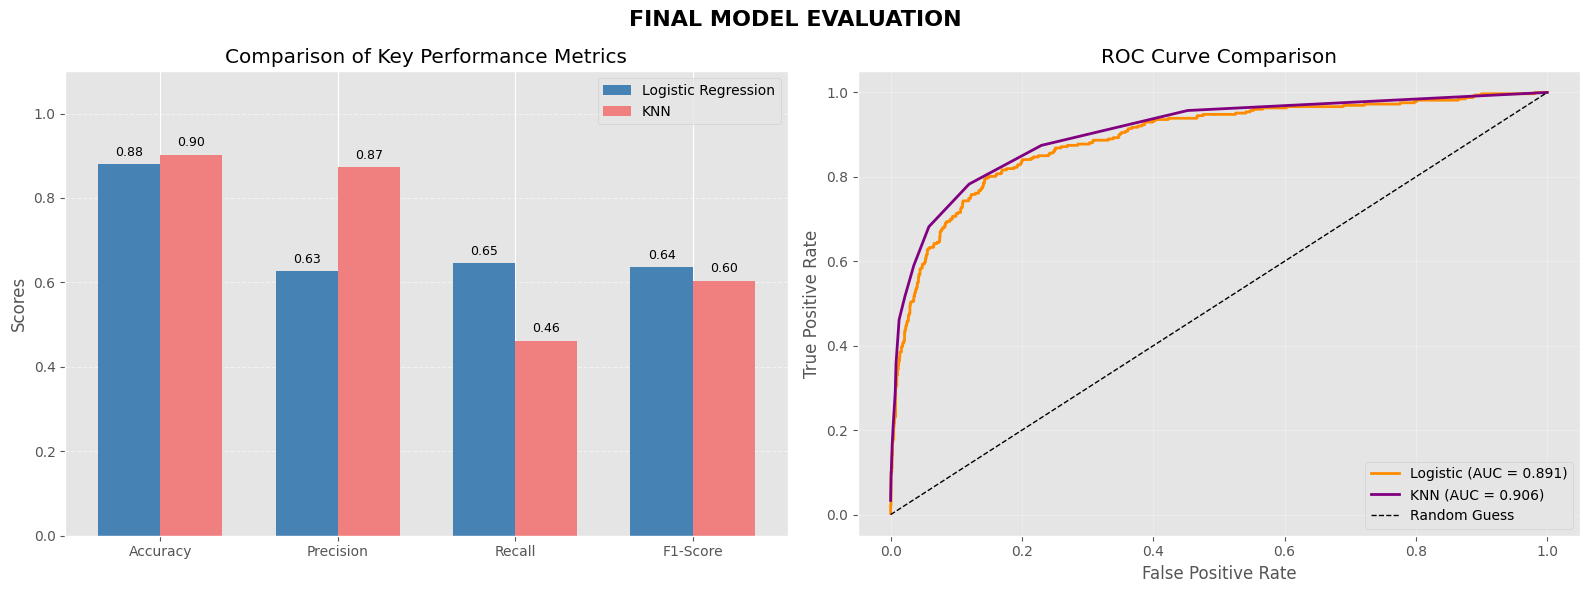

In [106]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
log_scores = [acc_log, prec_log, rec_log, f1_log]
knn_scores = [acc_knn, prec_knn, rec_knn, f1_knn]
x = np.arange(len(metrics))
width = 0.35
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(x - width/2, log_scores, width, label='Logistic Regression', color='steelblue')
ax1.bar(x + width/2, knn_scores, width, label='KNN', color='lightcoral')

ax1.set_ylabel('Scores')
ax1.set_title('Comparison of Key Performance Metrics')
ax1.set_xticks(x, metrics)
ax1.legend()
ax1.set_ylim(0, 1.1)
ax1.grid(axis='y', linestyle='--', alpha=0.5)

for i, v in enumerate(log_scores):
    ax1.text(i - width/2, v + 0.02, f'{v:.2f}', ha='center', fontsize=9)
for i, v in enumerate(knn_scores):
    ax1.text(i + width/2, v + 0.02, f'{v:.2f}', ha='center', fontsize=9)
    
ax2.plot(fpr_log, tpr_log, label=f'Logistic (AUC = {auc_log:.3f})', color='darkorange', lw=2)
ax2.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.3f})', color='purple', lw=2)
ax2.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Guess')

ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve Comparison')
ax2.legend(loc="lower right")
ax2.grid(True, alpha=0.3)

plt.suptitle('FINAL MODEL EVALUATION', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()